# Challenge - `Build A Mood Classifier Based On Facial Expressions` - With AI and Computer Vision

## DESCRIPTION

### The Objective:

The objective of this study is to classify mood of the person from facial expressions Images are categorized in three classes namely sadness, fear and happiness based on the emotion shown in the facial expressions .

 

### The Dataset:

 

The data consists of 48x48 pixel grayscale images of faces. The pixel values are stored in 2304 (48*48) columns. These column names start with pixel. Along with pixel values, there is emotion column that say about mood of the image.



The task is to categorize each face based on the emotion shown in the facial expression in to one of three categories.

 

Along with pixel values, aithon2020_level2_traning.csv dataset contains another column emotion that say about mood that is present in the image. This is the dataset you will use to train your model.

 

The final test set, which will be used to determine the winner of the competition, will be published later.


### Rules of submission:
 

- You have to submit folder after zipping it. The name of the folder is aithon2020_yourname_or_teamname

- The folder must not contain any dataset.

- If you have used any python libraries other than in default list, you have to mention in requirements.txt file. 

- There must be aithon_level2.py file inside the folder. And, a function name ‘aithon_level2_api’ must be defined inside the file.

- The function will be called to train and test your program.

- The function name, signature and output type is fixed.

- The first argument is file name that contains data for training.

- The second argument is file name that contains data for test.

- The function must return predicted value or emotion for each data in test dataset sequentially in a list. For example, ['sad', 'happy', 'fear', 'fear', ... , 'happy']

 

Please download a sample folder structure in which you have to submit your code from the following link:

[Click Here to Download](https://spotleai.sgp1.digitaloceanspaces.com/course/zip/aithon2020-level-2.zip)


The training dataset is stored inside the data folder.

 
By default following, Python libraries are installed in test environment

- Numpy
- Pandas
- OpneCV for Python
- TensorFlows
- Keras
- PyTorch
- Scikit-learn
- Theano
- Matplotlib
- Seaborn

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('moodsClassificationDataset.csv')

In [3]:
df.head()

,emotion,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2294,pixel_2295,pixel_2296,pixel_2297,pixel_2298,pixel_2299,pixel_2300,pixel_2301,pixel_2302,pixel_2303
0,Fear,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
1,Fear,55,55,55,55,55,54,60,68,54,...,90,83,77,53,37,34,30,34,30,57
2,Sad,20,17,19,21,25,38,42,42,46,...,29,36,68,91,85,93,97,99,107,118
3,Happy,4,2,13,41,56,62,67,87,95,...,59,66,80,74,69,99,28,3,7,12
4,Fear,255,255,255,255,255,255,255,255,255,...,94,21,22,51,71,80,82,79,79,83


In [4]:
2303/3

767.6666666666666

In [5]:
img = df.iloc[0,1:].values.reshape(48, 48)
img

array([[231, 212, 156, ..., 44, 27, 16],
       [229, 175, 148, ..., 27, 35, 27],
       [214, 156, 157, ..., 28, 22, 28],
       ...,
       [241, 245, 250, ..., 57, 101, 146],
       [246, 250, 252, ..., 78, 105, 162],
       [250, 251, 250, ..., 88, 110, 152]], dtype=object)

In [6]:
img = img.astype('float')
img.dtype

dtype('float64')

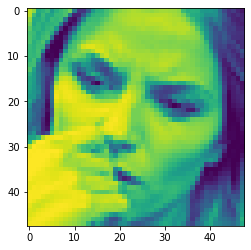

In [7]:
plt.imshow(img)

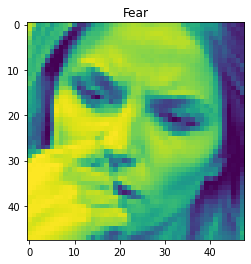

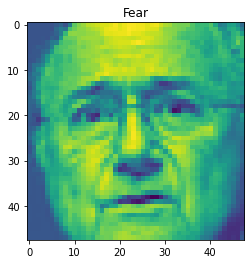

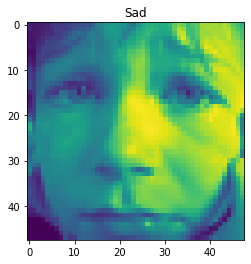

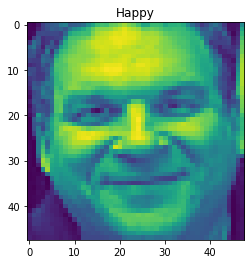

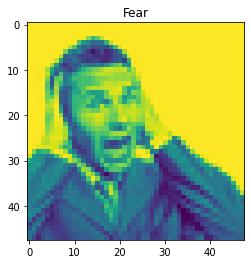

In [8]:
for i in range(5):
    img = df.iloc[i,1:].values.reshape(48, 48)

    img = img.astype('float')
    plt.imshow(img)
    plt.title(df.iloc[i,0])
    plt.show()

In [9]:
df.shape

(10817, 2305)

In [10]:
10817 * 0.70


7571.9

In [20]:
from sklearn.preprocessing import LabelEncoder

lbc = LabelEncoder()

In [22]:
X = df.drop('emotion', axis = 'columns').values
Y = lbc.fit_transform(df['emotion'])

In [23]:
X_train,X_test,y_train,y_test = X[:7571],X[7571:],Y[:7571],Y[7571:]

In [24]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([X_test[0]])

array([0])

In [28]:
y_test[0]

2

In [16]:
Y_pred = sgd_clf.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix,accuracy_score

confusion_matrix(y_test,Y_pred)

array([[467, 168, 146],
       [562, 698, 186],
       [502, 237, 280]], dtype=int64)

In [18]:
accuracy_score(y_test,Y_pred)

0.4451632778804683

In [30]:
from sklearn.ensemble import RandomForestClassifier

rnf_clf = RandomForestClassifier()

rnf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
rnf_clf.predict([X_test[0]])

array([0])

In [32]:
Y_pred = rnf_clf.predict(X_test)

In [33]:
accuracy_score(y_test,Y_pred)

0.5874922982131855